Let's get to it!

In [735]:
import numpy as np
import pandas as pd

In [736]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [737]:
df.isnull().sum().sum()

0

In [738]:
# y = wx + b

In [739]:
import matplotlib.pyplot as plt

In [740]:
x = [i for i in range(0, 16_000)]

w = 1
b = 0

y = [1000 * x_i + b for x_i in x]

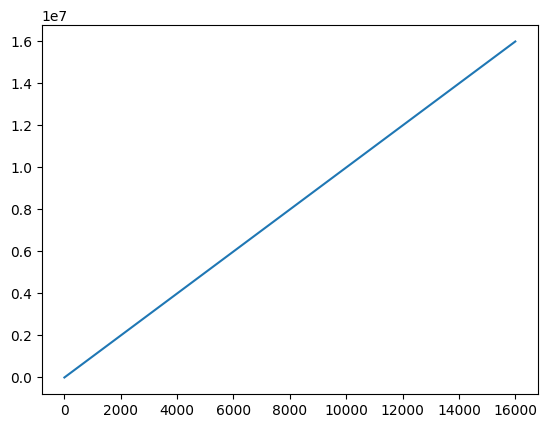

In [741]:
plt.plot(x, y);

In [742]:
df = df[['price', 'area']]

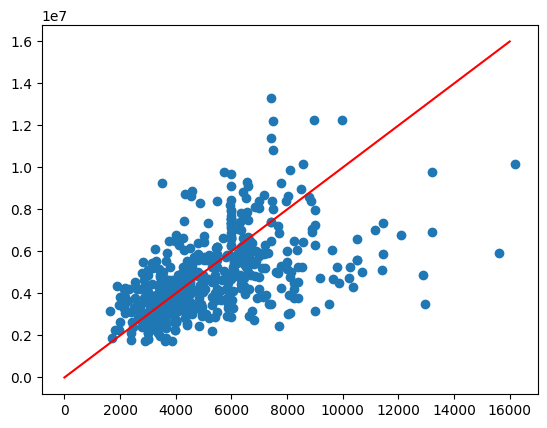

In [743]:
plt.scatter(df['area'], df['price'])
plt.plot(x, y, c='red')

In [744]:
x = df['area']
y = df['price']

In [745]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [746]:
min(x)

0.0

In [747]:
def cost_function(w, b, y_pred, y_true):
  loss = 0
  n = len(y_pred)
  assert(n == len(y_true))

  for i in range(n):
    loss += (y_pred[i] - y_true[i]) ** 2

  loss = loss / 2 * n

  return loss

In [748]:
def fit(x, y, epochs=100, lr=0.1):
  w = 1
  b = 0
  m = len(x)

  assert(m == len(y))


  for epoch in range(epochs):
    dw = 0
    db = 0

    for i in range(m):
      dw += (w * x[i] + b - y[i]) * x[i]
      db += (w * x[i] + b - y[i])

    w = w - (1 / m) * lr * dw
    b = b - (1 / m) * lr * db

    y_pred = [w * x_i + b for x_i in x]

    print(f'On epoch: {epoch} loss is: {cost_function(w, b, y_pred, y)}\n{"-" * 60}')

  return w, b

In [749]:
# w, b = fit(x, y, epochs=1000)

In [750]:
y_pred = [w * x_i + b for x_i in x]

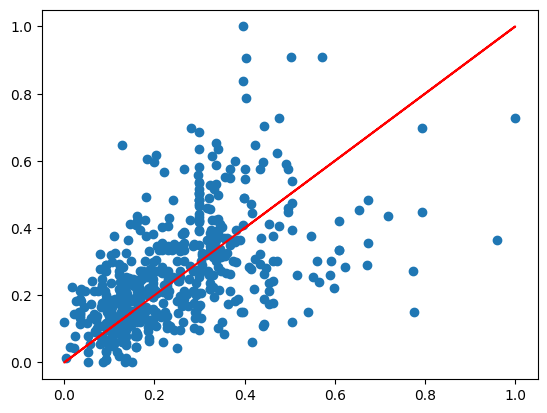

In [751]:
plt.scatter(x, y);
plt.plot(x, y_pred, c='red')

# **LOL SWEET**

<img src='https://www.memeatlas.com/images/wojaks/wojak-soy-boy-front.png' width=35%>

In [752]:
"""def predict(X):
  predictions = []

  for i in range(len(X)):
    predictions.append(w * X[i] + b)

  return predictions"""

'def predict(X):\n  predictions = []\n\n  for i in range(len(X)):\n    predictions.append(w * X[i] + b)\n\n  return predictions'

In [753]:
"""x_test = [0.86, 0.83, 0.24, 0, 0.34, 0.65, 0.7]
y_pred = predict(x_test)"""

'x_test = [0.86, 0.83, 0.24, 0, 0.34, 0.65, 0.7]\ny_pred = predict(x_test)'

In [754]:
# plt.plot(x_test, y_pred);

<img src='https://media.tenor.com/m-vr2mwFOTIAAAAi/xd.gif' width=5%>
IT WORKS
<img src='https://media.tenor.com/m-vr2mwFOTIAAAAi/xd.gif' width=5%>

<img src='https://i.redd.it/pvi8ctnhfzwc1.jpeg' width=40%>

UPDATE:

- implementation in class:

In [755]:
class LinearRegression:
  def __init__(self, w=1, b=0, lr=0.01):
    self.w = w
    self.b = b
    self.lr = lr


    self.loss_history = []
    self.patience_level = 0
    # self.modifier_list = {'early_stopping_modifier': self.early_stopping_modifier}
    self.losses_list = {'mse': self.mean_squared_error}



  # 0.1   Boring Shit  (modifiers, loss functions, blah blah blah)

  # modifiers
  # --------------
  """
  def early_stopping_modifier(self, n_iter, delta=0.01, loss_val=0):
    self.n_iter = n_iter
    self.delta = delta
    self.loss_val = loss_val

    if self.patience_level > n_iter:
      return 1

    elif loss_val >= min(self.loss_history):
        self.patience_level += 1

    else:
      self.patience_level = 0
    """


  # loss functions
  # --------------
  def mean_squared_error(self, pred, true):
    loss = 0
    n = len(pred)
    assert(n == len(true))

    for i in range(n):
      loss += (pred[i] - true[i]) ** 2

    loss = loss / 2 * n

    return loss


  # fit method
  def fit(self, x, y, epochs=100, lr=0.1, loss_function='mse'):
    n = len(x)

    assert(n == len(y))


    #   2.1.0  Gradient Descent Optimization
    for epoch in range(epochs):
      # partial derivatives of our linear regression
      # see details in the end of notebook👇
      dw = 0
      db = 0

      for i in range(n):
        dw += (self.w * x[i] + self.b - y[i]) * x[i]
        db += (self.w * x[i] + self.b - y[i])

      self.w = self.w - ((1 / n) * dw * self.lr)
      self.b = self.b - ((1 / n) * db * self.lr)

      # calculate loss:
      y_pred = [self.w * x[i] + self.b for i in range(len(x))]
      loss = self.losses_list[loss_function](y_pred, y)

      # stats for nerds🤓:

      print(f'Epoch: {epoch} | Loss: {loss} \n {"-" * 60}')


      self.loss_history.append(loss)

  # 2.3  prediction method
  def predict(self, X):
    prediction = []

    for val in X:
      prediction.append(self.w * val + self.b)
    return prediction



In [756]:
model = LinearRegression(lr=0.1)

model.fit(x, y, epochs=1_000)
pred = model.predict(x)

Epoch: 0 | Loss: 3397.4847756877025 
 ------------------------------------------------------------
Epoch: 1 | Loss: 3386.933126147744 
 ------------------------------------------------------------
Epoch: 2 | Loss: 3378.0157853133855 
 ------------------------------------------------------------
Epoch: 3 | Loss: 3370.4069202579267 
 ------------------------------------------------------------
Epoch: 4 | Loss: 3363.846053937062 
 ------------------------------------------------------------
Epoch: 5 | Loss: 3358.1249543806784 
 ------------------------------------------------------------
Epoch: 6 | Loss: 3353.07715400366 
 ------------------------------------------------------------
Epoch: 7 | Loss: 3348.5695714155027 
 ------------------------------------------------------------
Epoch: 8 | Loss: 3344.4958139529786 
 ------------------------------------------------------------
Epoch: 9 | Loss: 3340.7708237710376 
 ------------------------------------------------------------
Epoch: 10 | Lo

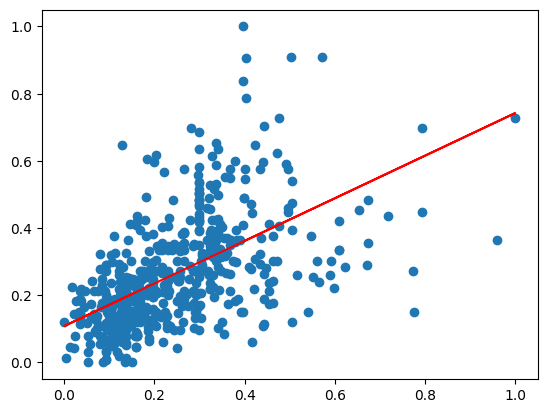

In [758]:
plt.scatter(x, y);
plt.plot(x, pred, c='red');

Hour of my life passed... <br>

I feel like I created something worthwhile!<br>

See ya!!!<br>
___

<img src='https://media1.tenor.com/m/OVHh61F6BYgAAAAd/jjkoobies-love-you-boys.gif' width=25%>